In [1]:
from skmisc.loess import loess
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Create a noisy sine wave

In [2]:
np.random.seed(123)
n = 100
x = np.linspace(-2*np.pi, 2*np.pi, n)
y = np.sin(x)
y2 = y + 0.1*np.random.randn(n)  # additive noise

In [3]:
lo = loess(x, y)
    # fit
lo.fit()
# Predict
prediction = lo.predict(x, stderror=True)
# Compute confidence intervals
ci = prediction.confidence(0.05)

In [4]:
# Helper function
def loess_fit(x, y, span=0.75):
    """
    loess fit and confidence intervals
    """
    # setup
    lo = loess(x, y, span=span)
    # fit
    lo.fit()
    # Predict
    prediction = lo.predict(x, stderror=True)
    # Compute confidence intervals
    ci = prediction.confidence(0.05)
    # Since we are wrapping the functionality in a function,
    # we need to make new arrays that are not tied to the
    # loess objects
    yfit = np.array(prediction.values)
    ymin = np.array(ci.lower)
    ymax = np.array(ci.upper)
    return yfit, ymin, ymax

The **span** controls the fraction of points used for the local regressions. The default is `0.75`,
below we change to `0.5`, then to `0.3`. The smoothed fit approaches the data, we expect this since
the noise is random and relatively small. All confidence interval are set at 95% (level = `0.05`).

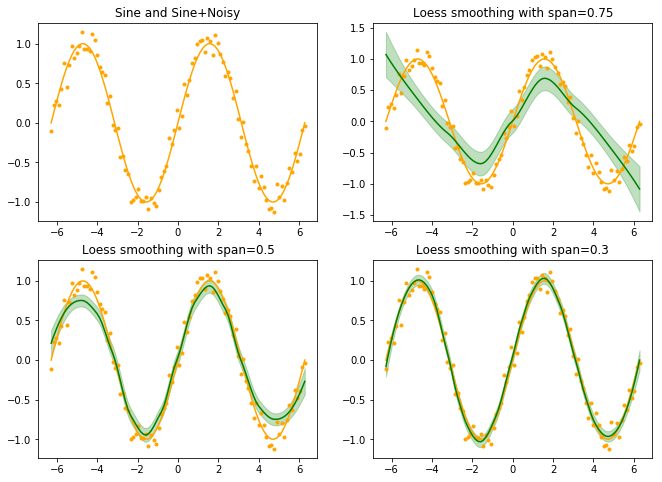

In [5]:
fig = plt.figure(figsize=(11, 8))
#fig.subplots_adjust(hspace=.35)

ax = fig.add_subplot(221)
ax.plot(x, y, color='orange')
ax.plot(x, y2, '.', color='orange')
ax.set_title('Sine and Sine+Noisy')

ax = fig.add_subplot(222)
yfit, ymin, ymax = loess_fit(x, y2)
ax.plot(x, y, color='orange')
ax.plot(x, y2, '.', color='orange')
ax.plot(x, yfit, color='green')
ax.fill_between(x, ymin, ymax, color='green', alpha=.25)
ax.set_title("Loess smoothing with span=0.75")

ax = fig.add_subplot(223)
yfit, ymin, ymax = loess_fit(x, y2, span=0.5)
ax.plot(x, y, color='orange')
ax.plot(x, y2, '.', color='orange')
ax.plot(x, yfit, color='green')
ax.fill_between(x, ymin, ymax, color='green', alpha=.25)
ax.set_title("Loess smoothing with span=0.5")

ax = fig.add_subplot(224)
yfit, ymin, ymax = loess_fit(x, y2, span=0.3)
ax.plot(x, y, color='orange')
ax.plot(x, y2, '.', color='orange')
ax.plot(x, yfit, color='green')
ax.fill_between(x, ymin, ymax, color='green', alpha=.25)
ax.set_title("Loess smoothing with span=0.3")